In [1]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

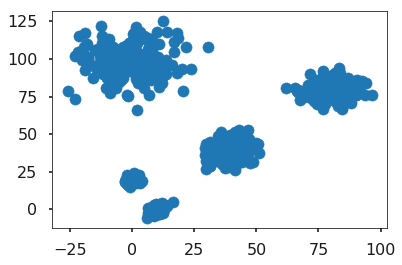

In [2]:
np.random.seed(4711)  
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([40, 40], [[20, 1], [1, 30]], size=[200,])
d = np.random.multivariate_normal([80, 80], [[30, 1], [1, 30]], size=[200,])
e = np.random.multivariate_normal([0, 100], [[100, 1], [1, 100]], size=[200,])
X2 = np.concatenate((a,b, c, d, e),)
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [3]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

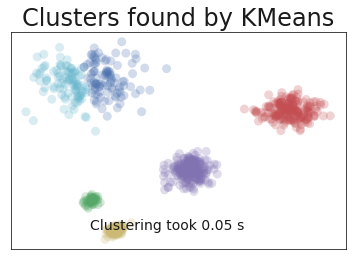

In [5]:
plot_clusters(X2, cluster.KMeans, (), {'n_clusters':6})

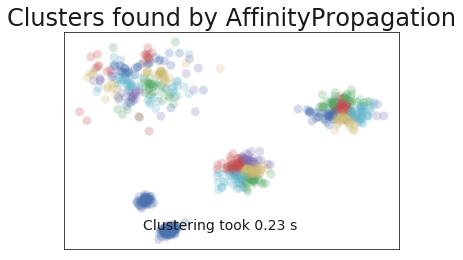

In [7]:
plot_clusters(X2, cluster.AffinityPropagation, (), {'preference':-5.0, 'damping':0.95})

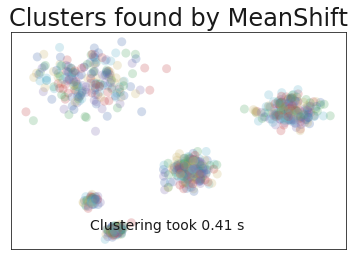

In [8]:
plot_clusters(X2, cluster.MeanShift, (0.175,), {'cluster_all':False})

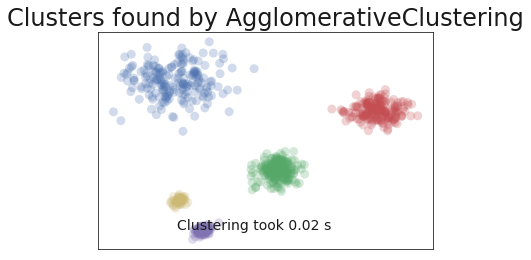

In [11]:
plot_clusters(X2, cluster.AgglomerativeClustering, (), {'n_clusters':5, 'linkage':'ward'})

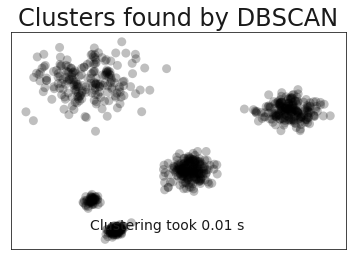

In [14]:
plot_clusters(X2, cluster.DBSCAN, (), {'eps':0.025})

In [16]:
!pip install hdbscan

    100% |████████████████████████████████| 4.7MB 108kB/s 
  Running setup.py bdist_wheel for hdbscan ... - \ | / - \ | / - \ | / - \ | / - \ | done
  Stored in directory: /Users/pratikaher/Library/Caches/pip/wheels/3c/66/6b/d47e0a5400f27f6cb22977e0e3c8826bc7e716c5b3f3ade0cb
Successfully built hdbscan


In [17]:
import hdbscan

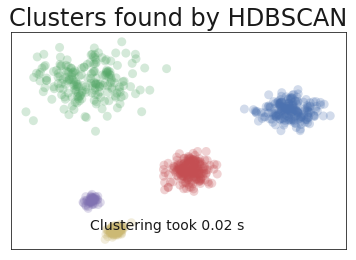

In [22]:
plot_clusters(X2, hdbscan.HDBSCAN, (), {'min_cluster_size':15})